In [9]:
#ASK: IS IT FINE THAT SIMPSON"S RULE IS SO GOOD AT MODELLING THE BESEL FUNCTION?

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.special import dawsn

In [5]:
#PART (a) i.

#Evaluating the dawson function using the trapezoid rule:

#Using trapezoid rule code from Lecture 2 notes:

#Define the integrand in the integral in the dawson function:
def f(x): 
    return np.e**(x**2)

a = 0.0 # beginning of interval
b = 4.0 # end of interval
N = 8 # number of slices
h = (b-a)/N # width of slice
s = 0.5*f(a) + 0.5*f(b) # the end bits

for k in range(1,N): # adding the interior bits
    s += f(a+k*h) 

trap_I = h*s 

trap_D = np.e**(-b**2) * trap_I
print("Using trapezoid rule with {0} slices, D({1}) =  {2}".format(N, b, trap_D))

#Evaluating the dawson function using Simpson's rule:

s = f(a) + f(b) # the end bits

for k in range(1,N,2): # adding the odd terms
    s += 4*f(a+k*h) 
for k in range(2,N,2): # adding the even terms
    s += 2*f(a+k*h) 

simp_I = h*s/3

simp_D = np.e**(-b**2) * simp_I

print("Using Simpson's rule with {0} slices, D({1}) =  {2}".format(N, b, simp_D))

print("The value given by scipy.special.dawsn is D({0}) = {1}".format(b,dawsn(4)))

Using trapezoid rule with 8 slices, D(4.0) =  0.26224782053479523
Using Simpson's rule with 8 slices, D(4.0) =  0.1826909645971217
The value given by scipy.special.dawsn is D(4.0) = 0.1293480012360051


In [8]:
#PART (a) ii.

#We run the code below while iterating N, to get a low N for an error of O(10^-9) for each method

#___________TRAPEZOID RULE:_________________
analytic_dawson = dawsn(4) #The value of the dawson function from scipy.special
a = 0.0 # beginning of interval
b = 4.0 # end of interval
N1 = 64 # number of slices for trapzeoid rule
h = (b-a)/N1 # width of slice
s = 0.5*f(a) + 0.5*f(b) # the end bits

for k in range(1,N1): # adding the interior bits
    s += f(a+k*h) 

trap_I = h*s
trap_D = np.e**(-b**2) * trap_I
trap_e = abs(trap_D - analytic_dawson) #take absolute value



#_____________SIMPSON'S RULE_______________
N2 = 64 # number of slices for Simpson's rule
h = (b-a)/N2 # width of slice
s = f(a) + f(b) # the end bits

for k in range(1,N2,2): # adding the odd terms
    s += 4*f(a+k*h) 
    
for k in range(2,N2,2): # adding the even terms
    s += 2*f(a+k*h) 

simp_I = h*s/3
simp_D = np.e**(-b**2) * simp_I
simp_e = abs(simp_D - analytic_dawson) #take absolute value


print("Error when using trapezoid rule with {0} slices at D({1}) is {2}".format(N1, b, trap_e))
print("Error when using Simpson's rule with {0} slices at D({1}) is {2}".format(N2, b, simp_e))
"""
#Getting the time taken for each of these:

#___________TRAPEZOID RULE:_________________
total_t1 = 0 #total time for trapezoid rule
for i in range(1000): #add up all the times, then divide by 1000
    start=time()
    h = (b-a)/N1
    s = 0.5*f(a) + 0.5*f(b) # the end bits

    for k in range(1,N1): # adding the interior bits
        s += f(a+k*h) 

    trap_I = h*s
    trap_D = np.e**(-b**2) * trap_I

    end=time()
    
    difference = end-start
    
    total_t1 += difference
    
avg_t1 = total_t1/1000


#___________SIMPSON'S RULE:_________________
total_t2 = 0 #total time for Simpson's rule

for i in range(1000):  #add up all the times, then divide by 1000
    start=time()
    h = (b-a)/N2
    s = f(a) + f(b) # the end bits

    for k in range(1,N2,2): # adding the odd terms
        s += 4*f(a+k*h) 

    for k in range(2,N2,2): # adding the even terms
        s += 2*f(a+k*h) 

    simp_I = h*s/3
    simp_D = np.e**(-b**2) * simp_I

    end=time()
    
    difference = end-start
    
    total_t2 += difference
    
avg_t2 = total_t2/1000

#___________scipy.special:_______________

total_t3 = 0 #total time for scipy.special.dawsn

for i in range(1000):  #add up all the times, then divide by 1000
    start=time()
    
    scipy_D = dawsn(4)

    end=time()
    
    difference = end-start
    
    total_t3 += difference
    
avg_t3 = total_t3/1000

print("Time taken to compute Dawson function with trapezoid rule with error of O(10^(-9)) at x=4: {0} s".format(avg_t1))
print("Time taken to compute Dawson function with Simpson's rule with error of O(10^(-9)) at x=4: {0} s".format(avg_t2))
print("Time taken to compute Dawson function with scipy.special.dawsn() at x=4: {0} s".format(avg_t3))



#HAVE TO ADD TIME FOR SCIPY VERSION!!!!!!!!!!!!!
"""

Error when using trapezoid rule with 64 slices at D(4.0) is 0.002592383731901071
Error when using Simpson's rule with 64 slices at D(4.0) is 4.5815078945382615e-05


'\n#Getting the time taken for each of these:\n\n#___________TRAPEZOID RULE:_________________\ntotal_t1 = 0 #total time for trapezoid rule\nfor i in range(1000): #add up all the times, then divide by 1000\n    start=time()\n    h = (b-a)/N1\n    s = 0.5*f(a) + 0.5*f(b) # the end bits\n\n    for k in range(1,N1): # adding the interior bits\n        s += f(a+k*h) \n\n    trap_I = h*s\n    trap_D = np.e**(-b**2) * trap_I\n\n    end=time()\n    \n    difference = end-start\n    \n    total_t1 += difference\n    \navg_t1 = total_t1/1000\n\n\n#___________SIMPSON\'S RULE:_________________\ntotal_t2 = 0 #total time for Simpson\'s rule\n\nfor i in range(1000):  #add up all the times, then divide by 1000\n    start=time()\n    h = (b-a)/N2\n    s = f(a) + f(b) # the end bits\n\n    for k in range(1,N2,2): # adding the odd terms\n        s += 4*f(a+k*h) \n\n    for k in range(2,N2,2): # adding the even terms\n        s += 2*f(a+k*h) \n\n    simp_I = h*s/3\n    simp_D = np.e**(-b**2) * simp_I\n\n 

In [4]:
#PART (a) iii.

##___________TRAPEZOID RULE:_________________
N1 = 32 # number of slices
h = (b-a)/N1 # width of slice
s = 0.5*f(a) + 0.5*f(b) # the end bits

for k in range(1,N1): # adding the interior bits
    s += f(a+k*h) 

I_1 = np.e**(-b**2) * h*s #Dawson integral for N1 slices


N2 = 64 # N2 = N1*2
h = (b-a)/N2 # width of slice
s = 0.5*f(a) + 0.5*f(b) # the end bits

for k in range(1,N2): # adding the interior bits
    s += f(a+k*h) 

I_2 = np.e**(-b**2) * h*s #Dawson integral for N2 slices

trap_e = abs((I_2 - I_1)/3) #get absolute error


##___________SIMPSON'S RULE:_________________
h = (b-a)/N1 # width of slice
s = f(a) + f(b) # the end bits

for k in range(1,N1,2): # adding the odd terms
    s += 4*f(a+k*h) 
for k in range(2,N1,2): # adding the even terms
    s += 2*f(a+k*h) 

I_1 = np.e**(-b**2) * h*s/3  #Dawson integral for N1 slices


h = (b-a)/N2 # width of slice
s = f(a) + f(b) # the end bits

for k in range(1,N2,2): # adding the odd terms
    s += 4*f(a+k*h) 
for k in range(2,N2,2): # adding the even terms
    s += 2*f(a+k*h) 

I_2 = np.e**(-b**2) * h*s/3  #Dawson integral for N1 slices


simp_e = abs((I_2 - I_1)/15) #get absolute error


print("The practically estimated error for trapezoid rule for {0} slices and x={1} is: {2}".format(N2, b, trap_e))
print("The practically estimated error for Simpson's rule for {0} slices and x={1} is: {2}".format(N2, b, simp_e))


The practically estimated error for trapezoid rule for 64 slices and x=4.0 is: -0.0025465686529556795
The practically estimated error for Simpson's rule for 64 slices and x=4.0 is: -4.115768458675858e-05


In [10]:
#Part (b)

#Excercise 5.4 (a)

from scipy.special import jv

#Writing a python function to calculate the Bessel function J_m(x) using Simpson's method:
def J(m, x):
    
    #Define the integrand in the integral in the Bessel function:
    def f(theta):
        return np.cos(m*theta - x*np.sin(theta))
    
    N = 1000 # number of slices
    a = 0
    b = np.pi
    h = (b-a)/N # width of slice
    s = f(a) + f(b) # the end bits
    
    for k in range(1,N,2): # adding the odd terms
        s += 4*f(a+k*h) 
    for k in range(2,N,2): # adding the even terms
        s += 2*f(a+k*h) 

    J = (h/3)*s/np.pi #final result
    
    return J

In [11]:
x_list = np.arange(0,20,0.1)

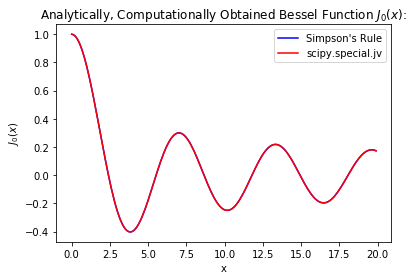

In [12]:
plt.plot(x_list, J(0,x_list), color="b", label="Simpson's Rule")
plt.plot(x_list, jv(0, x_list), color="r", label="scipy.special.jv")
plt.title(r"Analytically, Computationally Obtained Bessel Function $J_0(x)$:")
plt.xlabel("x")
plt.ylabel(r"$J_0(x)$")
plt.legend()
plt.savefig("Q2_J0.pdf")

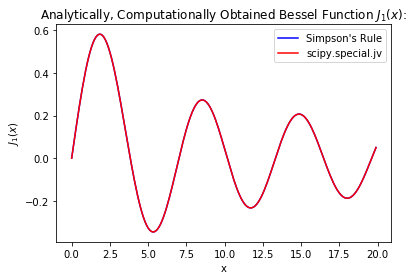

In [13]:
plt.clf()
plt.plot(x_list, J(1,x_list), color="b", label="Simpson's Rule")
plt.plot(x_list, jv(1, x_list), color="r", label="scipy.special.jv")
plt.title(r"Analytically, Computationally Obtained Bessel Function $J_1(x)$:")
plt.xlabel("x")
plt.ylabel(r"$J_1(x)$")
plt.legend()
plt.savefig("Q2_J1.pdf")

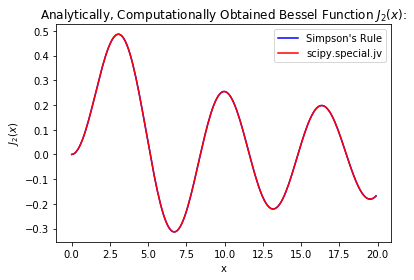

In [14]:
plt.clf()
plt.plot(x_list, J(2,x_list), color="b", label="Simpson's Rule")
plt.plot(x_list, jv(2, x_list), color="r", label="scipy.special.jv")
plt.title(r"Analytically, Computationally Obtained Bessel Function $J_2(x)$:")
plt.xlabel("x")
plt.ylabel(r"$J_2(x)$")
plt.legend()
plt.savefig("Q2_J2.pdf")

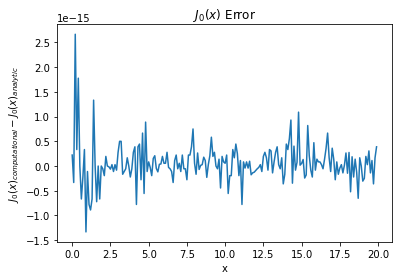

In [30]:
#Differences:
plt.plot(x_list, J(0,x_list)-jv(0, x_list))
plt.title(r"$J_0(x)$ Error")
plt.xlabel("x")
plt.ylabel(r"$J_0(x)_{computational} - J_0(x)_{analytic}$")
plt.savefig("Q2_J0_diff.pdf")

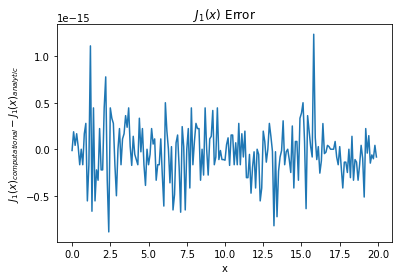

In [31]:
#Differences:
plt.plot(x_list, J(1,x_list)-jv(1, x_list))
plt.title(r"$J_1(x)$ Error")
plt.xlabel("x")
plt.ylabel(r"$J_1(x)_{computational} - J_1(x)_{analytic}$")
plt.savefig("Q2_J1_diff.pdf")

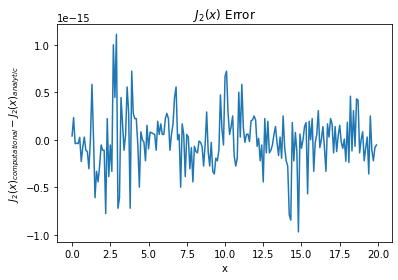

In [32]:
#Differences:
plt.plot(x_list, J(2,x_list)-jv(2, x_list))
plt.title(r"$J_2(x)$ Error")
plt.xlabel("x")
plt.ylabel(r"$J_2(x)_{computational} - J_2(x)_{analytic}$")
plt.savefig("Q2_J2_diff.pdf")

In [87]:
#Excercise 5.4 (b)

w = 500 #Wavelength, units of nm

k = 2 * np.pi / w #wave number, units of nm^{-1}

#Gets the intensity of light in the circular diffraction pattern
def I(r): #inputs are the Bessel function J1, wavenumber k, radius r
    if(r > 1e-5):
        return (J(1,k*r)/(k*r))**2
    else: #In the limit r->0, we have I(k,r)->1/4
        return 1/4

In [94]:
len(np.arange(-1000, 1000, 5))

400

In [113]:
x = np.arange(-1000, 1000, 10) #goes from -1000 nm to 1000 nm (so -1µ to 1µ)
y = np.arange(-1000, 1000, 10) 
z = np.zeros([len(x),len(y)]) #empty array

#populate z array:
for i in range(len(x)):
    for j in range(len(y)):
        z[i,j] = I(np.sqrt(x[i]**2 + y[j]**2))
 #   print(i)

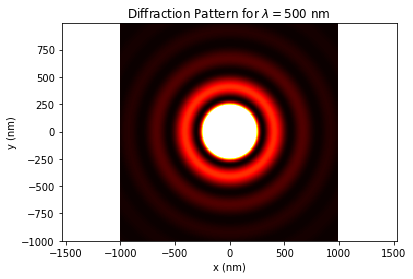

In [145]:
plt.pcolormesh(x,y,z, vmax = 0.01, cmap="hot")
plt.axis("equal")
plt.title(r"Diffraction Pattern for $\lambda=500$ nm")
plt.xlabel("x (nm)")
plt.ylabel("y (nm)")
plt.savefig("Q2_diffraction.pdf")

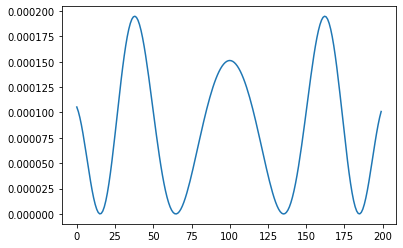

In [142]:
plt.plot(z[0])